In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size
     

In [5]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]])   # row vector
v + w

array([[11, 21],
       [12, 22],
       [13, 23]])

Матрица – это вектор, перенесенный на следующий уровень. Матрицы как
математические объекты очень разноплановы. В них могут храниться набо-
ры уравнений, геометрические преобразования, положения частиц во време-
ни, финансовые отчеты и громадное число других вещей. В науке о данных
мат­ри­цы иногда называют таблицами данных, в которых строки соответ-
ствуют наблюдениям (например, клиентам), а столбцы – признакам (напри-
мер, покупкам).
Данная и следующие две главы выведут ваши знания о линейной алгебре
на новый уровень. Выпейте чашечку кофе и наденьте свою мыслительную
тюбетейку. К концу главы ваш мозг станет больше.

### Создание и визуализация матриц в NumPy

В зависимости от контекста мат­ри­цы концептуализируются в уме как мно-
жество векторов-столбцов, расположенных бок о бок (например, как таблицы
в формате «наблюдения по признакам»), как множество уложенных стопкой
векторов-строк (например, в виде мультисенсорных данных, в которых каж-
дая строка – это временной ряд из другого канала) или как упорядоченный
набор отдельных матричных элементов (например, в виде изображения,
в каждом матричном элементе которого закодировано значение интенсив-
ности пиксела).

##### Визуализация, индексация и нарезка матриц
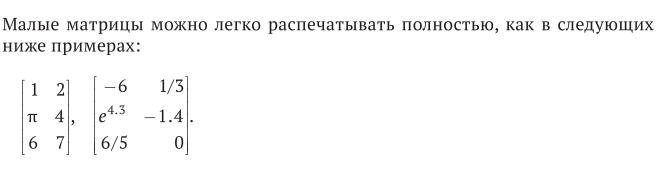

Но это не масштабируется, и матрицы, с которыми вы работаете на практике, могут быть большими, возможно, содержащими миллиарды элементов.
Поэтому более крупные матрицы можно визуализировать в виде изображений. 

Числовое значение каждого элемента матричной карты соотносится с цветом изображения. В большинстве случаев такие карты псевдоцветны,
поскольку соотнесенность числового значения с цветом является произвольной. На рис. 5.1 показано несколько примеров матриц, визуализированных в виде изображений с использованием библиотеки Python matplotlib.

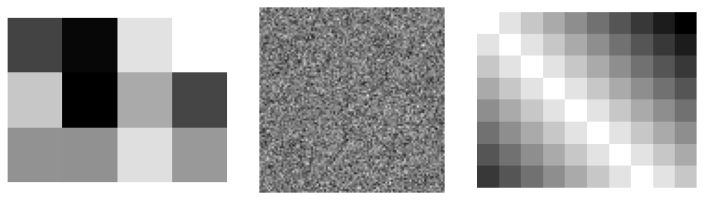

In [2]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

#### Обозначения матриц

Матрицы обозначаются заглавными буквами жирным шрифтом, например матрица A или M. Размер матрицы указывается традиционным образом
в формате (строка, столбец). Например, следующая ниже матрица имеет размер 3×5, поскольку в ней три строки и пять столбцов:

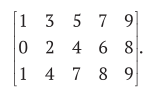

На конкретные элементы матрицы можно ссылаться, обращаясь по индексу строки и столбца: элемент в 3-й строке и 4-м столбце матрицы A обозначается как a3.4 (в предыдущем примере матрицы a3.4 = 8). Важное напоминание: в математике используется индексация с отсчетом от единицы, в то время как в Python используется индексация с отсчетом от нуля. Таким образом, в Python элемент a3.4 индексируется как A[2,3].

#### Немного про слайсинг матриц

Подмножество строк или столбцов матрицы извлекается с помощью операции нарезки. Для того чтобы извлечь срез из матрицы, надо указать начальные и конечные строки и столбцы, а также шаг нарезки, равный 1. Онлайновый исходный код проведет вас по
всей процедуре, а следующий ниже исходный код показывает пример извлечения подматрицы из строк 2–4 и столбцов 1–5 более крупной матрицы:

In [5]:
A = np.arange(60).reshape(6,10)
print(A)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


In [9]:
# нарезаем со 2ой по 4ую строку, с первого по пятый столбец
sub = A[1:4, 0:5]
print(sub)

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


### Специальные матрицы

#### Матрица случайных чисел

Это матрица, которая содержит числа, берущиеся случайно из некоторого распределения, обычно гауссова (также именуемого нормальным). Матри-
цы случайных чисел отлично подходят для обследования линейной алгебры в исходном коде, потому что они быстро и легко создаются с любым размером и рангом

In [11]:
rows = 5
cols = 4
matrix = np.random.randn(rows, cols)
print(matrix)

[[-0.47594329 -0.27259942 -0.78084569  0.35741188]
 [ 1.68530758  0.08655342 -0.17063343 -0.32717502]
 [-0.25037835  1.42124742 -0.76909422  1.10253208]
 [-0.69920442  2.93750084  0.81023941  0.22184193]
 [ 0.83113728 -0.01798509  1.27252531 -0.37125948]]


#### Квадратная и неквадратная

Квадратная матрица имеет такое же число строк, что и столбцов; другими словами, матрица имеет размер ℝN×N. Неквадратная матрица, также иногда именуемая прямоугольной матрицей, имеет отличающееся число строк и столбцов. Квадратные и прямоугольные матрицы можно создавать из случайных чисел, настроив параметры очертания в приведенном выше исходном коде.
Прямоугольные матрицы называются высокими, если в них больше строк, чем столбцов, и широкими, если в них больше столбцов, чем строк.

In [17]:
rows = 4
cols = 4
square_matrix = np.random.randn(rows, cols)
print(square_matrix)

[[-0.27463732 -0.13005941  1.69056895 -0.30962335]
 [-0.45648755  0.17301542  0.29751396  1.44770586]
 [-1.10902404 -0.88303601 -0.41315919 -0.61310697]
 [-0.61697859 -1.13073003 -0.12221057 -2.98835461]]


In [23]:
rows = 4
cols = 2
square_matrix = np.random.randn(rows, cols)
print(square_matrix)

[[ 0.33522249  0.06267945]
 [-0.60609263 -1.78135235]
 [-0.50121428 -0.96340636]
 [-1.72328318 -0.43281421]]


In [22]:
rows = 2
cols = 4
square_matrix = np.random.randn(rows, cols)
print(square_matrix)

[[-2.38326675  1.13657377 -0.65093429  0.41198225]
 [ 0.28901921  1.30771898  0.85728359 -0.49434838]]


#### Треугольная

Треугольная матрица содержит одни нули выше либо ниже главной диагонали. Матрица называется верхней треугольной, если ненулевые элементы находятся выше диагонали, и нижней треугольной, если ненулевые элементы находятся ниже диагонали.

В NumPy имеются специальные функции для извлечения верхнего (np.triu()) либо нижнего (np.tril()) треугольника матрицы.

##### Верхнетреугольная матрица

[np.triu - docs](https://numpy.org/doc/2.1/reference/generated/numpy.triu.html)

In [30]:
np.triu([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

##### Нижнетреугольная матрица

[np.tril - docs](https://numpy.org/doc/2.1/reference/generated/numpy.tril.html)

In [32]:
np.tril([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

### Единичная матрица

Единичная матрица является одной из наиболее важных специальных матриц. Она эквивалентна числу 1 в том смысле, что любая матрица или
вектор, умноженные на единичную матрицу, будут той же самой матрицей или вектором. Единичная матрица – это квадратная диагональная матрица, все диагональные элементы которой имеют значение 1. Она обозначается буквой I. Иногда вместе с буквой можно увидеть индекс, указывающий на ее размер (например, $I_5$ – это единичная матрица размером 5×5); если индекса нет, то ее размер можно определить из контекста (например, чтобы уравнение было совместимым).

В Python единичная матрица создается функцией [np.eye() - docs](https://numpy.org/devdocs/reference/generated/numpy.eye.html)

In [33]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Матрица нулей

Матрица нулей сравнима с вектором нулей: это мат­ри­ца, состоящая из одних нулей. Как и вектор нулей, она обозначается отмеченным жирным шрифтом нулем: 0. Возможно, то, что один и тот же символ обозначает как вектор, так и мат­ри­цу, будет немного сбивать с толку, но в математической и естественно-научной нотации такого рода перегрузка довольно распространена.
    
Матрица нулей создается функцией [np.zeros()](https://numpy.org/doc/2.1/reference/generated/numpy.zeros.html)

In [37]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

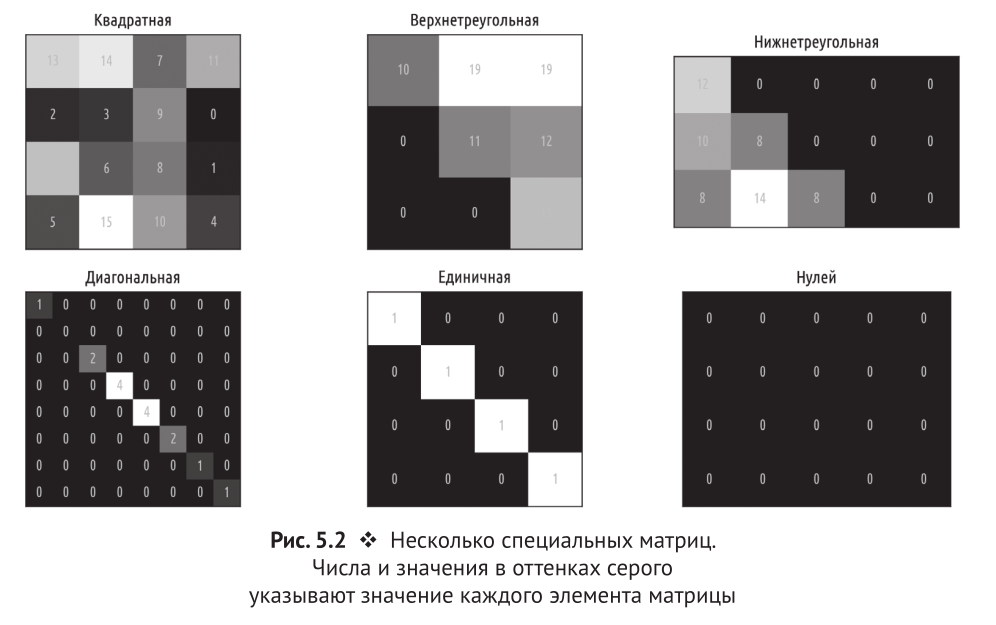

### Матричная математика: сложение, умножение на скаляр, адамарово умножение

#### Сложение и вычитание

Две матрицы складываются путем сложения соответствующих элементов
матриц.

In [40]:
Matrix_A = np.random.randn(4,4)
Matrix_A

array([[ 0.81169495, -0.21956755,  0.76521933, -2.19119308],
       [-0.00806914, -0.45578354,  0.03683648,  0.72826243],
       [ 1.3271965 ,  0.90894865,  0.40656019, -0.34164443],
       [-2.13986882, -0.32322619, -0.11817068, -0.95052818]])

In [57]:
Matrix_Ones = np.ones((4,4), int)
Matrix_Ones

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [58]:
print(Matrix_Ones + Matrix_A)
print('\n')
print(Matrix_Ones - Matrix_A)

[[ 1.81169495  0.78043245  1.76521933 -1.19119308]
 [ 0.99193086  0.54421646  1.03683648  1.72826243]
 [ 2.3271965   1.90894865  1.40656019  0.65835557]
 [-1.13986882  0.67677381  0.88182932  0.04947182]]


[[ 0.18830505  1.21956755  0.23478067  3.19119308]
 [ 1.00806914  1.45578354  0.96316352  0.27173757]
 [-0.3271965   0.09105135  0.59343981  1.34164443]
 [ 3.13986882  1.32322619  1.11817068  1.95052818]]


#### "Сдвиг" матрицы

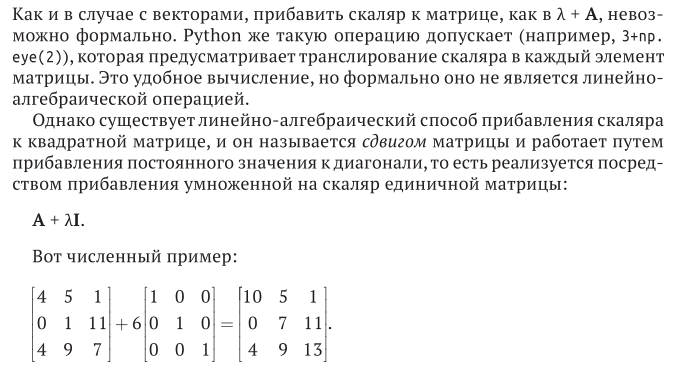

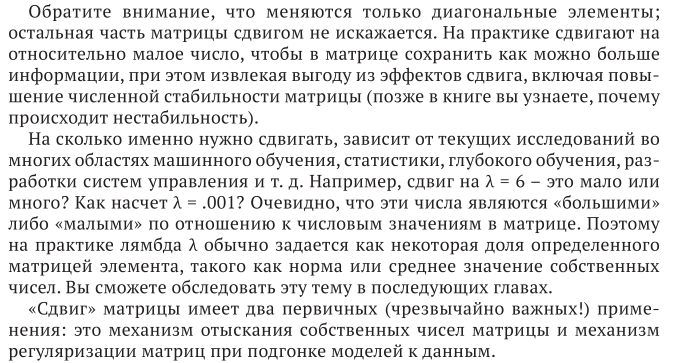

In [54]:
A = np.array([[4,5,1], [0,1,11], [4,9,7]])
s = 6
print(A)

[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]


In [55]:
A + s # НЕ сдвигается!

array([[10, 11,  7],
       [ 6,  7, 17],
       [10, 15, 13]])

In [56]:
A + s*np.eye(len(A)) # сдвигается

array([[10.,  5.,  1.],
       [ 0.,  7., 11.],
       [ 4.,  9., 13.]])

### Умножение на скаляр и адамарово умножение

#### Умножение на скаляр

Умножение матрицы на скаляр означает умножение каждого элемента
матрицы на один и тот же скаляр.

In [61]:
Matrix = np.ones((4,4), int)
scalar = 2

In [63]:
Matrix * scalar

array([[2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2]])

#### Адамарово умножение

Адамарово умножение аналогичным образом предусматривает поэлементное умножение двух матриц (отсюда и альтернативная терминология - поэлементное умножение).

In [69]:
A = np.arange(16).reshape(4,4)
B = np.arange(17,33).reshape(4,4)
print(A)
print('\n')
print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


[[17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]


In [73]:
print(A*B)

[[  0  18  38  60]
 [ 84 110 138 168]
 [200 234 270 308]
 [348 390 434 480]]


In [74]:
print(np.multiply(A, B))

[[  0  18  38  60]
 [ 84 110 138 168]
 [200 234 270 308]
 [348 390 434 480]]


In [72]:
# НЕАДАМАРОВО!
print(A@B)

[[ 158  164  170  176]
 [ 526  548  570  592]
 [ 894  932  970 1008]
 [1262 1316 1370 1424]]


### Стандартное умножение матриц

Вместо того, чтобы оперировать поэлементно, умножение матриц оперирует построчно/постолбцово. Стандартное умножение матриц сводится к систематический коллекции точечных произведений между строками одной матрицы и столбцами другой матрицы.

**ВАЖНО!**

Матрицы можно перемножать только если их размерности согласуются.

Число строк одной матрицы должно соответствовать числу столбцов другой.

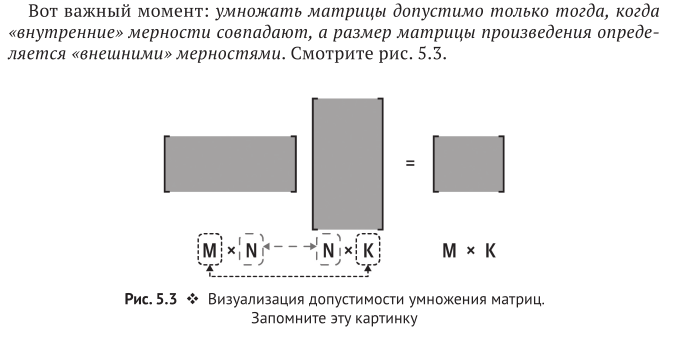

Можно увидеть, что умножение матрицы НЕ подчиняется коммутативному закону: умножение *АВ* может быть допустимо. а вот *ВА* уже нет.

Даже есть обе матрицы будут квадратными, они могут давать различные результаты. АВ = C, а вот ВА = D, C != D.

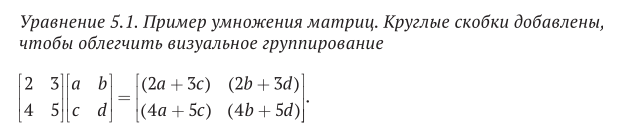

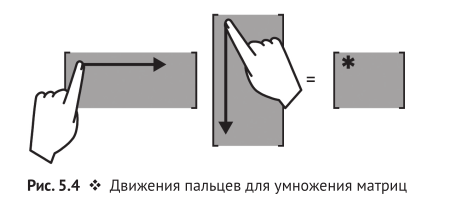

In [2]:
A = np.arange(16).reshape(4,4)
B = np.arange(17,33).reshape(4,4)
print(A)
print('\n')
print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


[[17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]]


In [3]:
print(np.dot(A,B))

[[ 158  164  170  176]
 [ 526  548  570  592]
 [ 894  932  970 1008]
 [1262 1316 1370 1424]]


In [5]:
print(np.matmul(A, B))

[[ 158  164  170  176]
 [ 526  548  570  592]
 [ 894  932  970 1008]
 [1262 1316 1370 1424]]


### Умножение матрицы на вектор

В строго механическом понимании, операция умножения матрицы на вектор не представляет собой чего-то выдающегося и не заслуживает отдельного рассмотрения; по сути, это просто частный случай умножения матриц, где роль одной из матриц выполняет вектор.

Однако, взаимодействие матрицы и вектора имеет широкое применение в различных областях, таких как анализ данных, машинное обучение и компьютерная графика, поэтому стоит потратить немного времени на эту тему. Давайте начнем с базовых понятий.

*   Матрицу можно умножить на вектор-столбец, находящийся справа, но не на вектор-строку. Аналогично, ее можно умножить на вектор-строку, расположенную слева, но не на вектор-столбец. Иначе говоря, операции `Av` и `v^T A` допустимы, а `Av^T` и `vA` – не допустимы. Это объясняется размерностями матриц: матрицу `M x N` можно умножить слева на матрицу `1 x M` (которая представляет собой вектор-строку) или справа на матрицу `N x 1` (то есть вектор-столбец).

*   Результатом умножения матрицы на вектор всегда будет вектор, и его ориентация зависит от ориентации вектора-множителя: если матрицу умножают на вектор-строку, то получится вектор-строка, а если на вектор-столбец, то – вектор-столбец. Это становится очевидным, если учитывать размеры матриц, но это стоит упомянуть.

Умножение матриц на векторы находит множество применений: 
- В статистике прогнозируемые значения данных получаются через умножение расчетной матрицы на вектор коэффициентов регрессии, что выражается как `Bβ`.
- В анализе главных компонент вычисляется вектор весовых коэффициентов (важности признаков), максимизирующий дисперсию в наборе данных `Y`, и это записывается как `(Y^T Y)v` (где вектор важностей признаков `v` называется собственным вектором).
- В многомерной обработке сигналов компонент, редуцированный по размерности, извлекается путем применения пространственного фильтра к данным многоканального временного ряда `S`, и это записывается как `w^T S`.
- В геометрии и компьютерной графике преобразование координат изображения выполняется посредством применения матрицы математического преобразования `T`, и преобразование записывается как `Tp`, где `p` – множество геометрических координат.

В прикладной линейной алгебре есть еще множество применений умножения матрицы на вектор.


In [9]:
# Пример 1: Умножение матрицы 2x2 на вектор-столбец 2x1

A = np.array([[1, 2],
              [3, 4]])

v = np.array([5, 6])  # Вектор-столбец (фактически, одномерный массив)

result = np.dot(A, v)  # Или: result = A @ v

print("Матрица A:\n", A)
print("Вектор v:\n", v)
print("Результат A * v:\n", result)

Матрица A:
 [[1 2]
 [3 4]]
Вектор v:
 [5 6]
Результат A * v:
 [17 39]


In [10]:
# Пример 2: Умножение матрицы 3x2 на вектор-столбец 2x1

B = np.array([[1, 2],
              [3, 4],
              [5, 6]])

w = np.array([7, 8])

result2 = np.dot(B, w)

print("\nМатрица B:\n", B)
print("Вектор w:\n", w)
print("Результат B * w:\n", result2)


Матрица B:
 [[1 2]
 [3 4]
 [5 6]]
Вектор w:
 [7 8]
Результат B * w:
 [23 53 83]


In [11]:
# Пример 3: Умножение вектор-строки 1x3 на матрицу 3x3

u = np.array([1, 2, 3]) # Вектор-строка (фактически, одномерный массив)

C = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])  # Единичная матрица 3x3

result3 = np.dot(u, C)

print("\nВектор u:\n", u)
print("Матрица C:\n", C)
print("Результат u * C:\n", result3)


Вектор u:
 [1 2 3]
Матрица C:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Результат u * C:
 [1 2 3]


In [12]:
# Пример 4: Вектор строка умноженный на вектор столбец дает число.

x = np.array([1, 2, 3])  # Вектор-строка

y = np.array([4, 5, 6])  # Вектор-столбец

result4 = np.dot(x, y)  # Это скалярное произведение

print("\nВектор x:\n", x)
print("Вектор y:\n", y)
print("Результат x * y:\n", result4)  # Скалярное произведение


Вектор x:
 [1 2 3]
Вектор y:
 [4 5 6]
Результат x * y:
 32


### Линейно взвешенные комбинации

В предыдущей главе мы рассчитывали линейно-взвешенные комбинации, используя отдельные скаляры и векторы, а затем перемножали их по отдельности. Но теперь вы стали умнее, чем когда начинали предыдущую главу, и поэтому готовы усвоить более оптимальный, более компактный и масштабируемый метод вычисления линейно-взвешенных комбинаций: помещать отдельные векторы в матрицу, а веса – в соответствующие элементы вектора. И затем умножать. Вот численный пример:

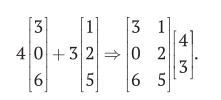

Пожалуйста, найдите минутку, чтобы проработать умножение, и убедитесь, что понимаете принцип реализации линейно-взвешенной комбинации двух векторов в виде умножения матрицы на вектор. Ключевой момент заключается в том, что каждый элемент в векторе умножает соответствующий столбец в матрице на скаляр, а затем взвешенные векторы-столбцы суммируются, чтобы получить произведение.

Данный пример предусматривает линейно-взвешенные комбинации векторов-столбцов; что бы вы изменили для вычисления линейно-взвешенных комбинаций векторов-строк<sup>1</sup>?
Поместить коэффициенты в вектор-строку и предпозиционно умножить на этот
вектор.

In [15]:
# Исходные векторы-столбцы
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
v3 = np.array([7, 8, 9])

# Веса
w1 = 0.5
w2 = 0.3
w3 = 0.2

# Создаем матрицу, объединив векторы-столбцы (транспонируем, чтобы разместить их по столбцам)
A = np.column_stack((v1, v2, v3))  # Или A = np.array([v1, v2, v3]).T

# Создаем вектор весов
w = np.array([w1, w2, w3])

# Вычисляем линейно-взвешенную комбинацию
linear_combination = np.dot(A, w)  # Или A @ w

print("Матрица векторов-столбцов:\n", A)
print("Вектор весов:\n", w)
print("Линейно-взвешенная комбинация:\n", linear_combination)

Матрица векторов-столбцов:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]
Вектор весов:
 [0.5 0.3 0.2]
Линейно-взвешенная комбинация:
 [3.1 4.1 5.1]


In [14]:
# Исходные векторы-строки
u1 = np.array([1, 2])
u2 = np.array([3, 4])
u3 = np.array([5, 6])

# Веса
a1 = 0.4
a2 = 0.6
a3 = 0.0

# Создаем матрицу, где каждый ряд - вектор-строка
B = np.row_stack((u1, u2, u3))  # Или B = np.array([u1, u2, u3])

# Вектор весов (должен быть вектором-строкой для правильного умножения)
a = np.array([a1, a2, a3])

#Вычисление линейно-взвешенной комбинации векторов-строк
linear_combination_rows = np.dot(a, B) # Или a @ B

print("Матрица векторов-строк:\n", B)
print("Вектор весов:\n", a)
print("Линейно-взвешенная комбинация (строка):\n", linear_combination_rows)

Матрица векторов-строк:
 [[1 2]
 [3 4]
 [5 6]]
Вектор весов:
 [0.4 0.6 0. ]
Линейно-взвешенная комбинация (строка):
 [2.2 3.2]


/tmp/ipykernel_10096/1102118802.py:12: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  B = np.row_stack((u1, u2, u3))  # Или B = np.array([u1, u2, u3])


### Матричные операции: Транспонирование

Транспонирование матрицы — это одна из фундаментальных операций в линейной алгебре. Она заключается в **отражении матрицы относительно её главной диагонали**.  

Главная диагональ — это линия, идущая из верхнего левого угла в нижний правый.

**Что это значит на практике:**

*   Строки матрицы становятся столбцами.
*   Столбцы матрицы становятся строками.

**Обозначение:**

Транспонированная матрица для матрицы *A* обычно обозначается как *A<sup>T</sup>* или *A'*.

**Пример:**

Допустим, у нас есть матрица *A*:

```
A = [[1, 2, 3],
     [4, 5, 6]]
```

Транспонированная матрица *A<sup>T</sup>* будет выглядеть так:

```
A^T = [[1, 4],
       [2, 5],
       [3, 6]]
```

**Размерность:**

Если матрица *A* имеет размерность *m x n* ( *m* строк и *n* столбцов), то транспонированная матрица *A<sup>T</sup>* будет иметь размерность *n x m*.

**Свойства транспонирования:**

Транспонирование обладает несколькими важными свойствами:

1.  **(A<sup>T</sup>)<sup>T</sup> = A**:  Двойное транспонирование возвращает исходную матрицу.
2.  **(A + B)<sup>T</sup> = A<sup>T</sup> + B<sup>T</sup>**:  Транспонирование суммы матриц равно сумме их транспонированных матриц.
3.  **(cA)<sup>T</sup> = cA<sup>T</sup>**:  Транспонирование матрицы, умноженной на скаляр, равно скаляру, умноженному на транспонированную матрицу.
4.  **(AB)<sup>T</sup> = B<sup>T</sup>A<sup>T</sup>**:  Транспонирование произведения матриц равно произведению транспонированных матриц в обратном порядке.  Это, пожалуй, самое важное и часто используемое свойство.

**Применение транспонирования:**

Транспонирование используется во многих областях математики, физики, инженерии и компьютерных наук. Вот несколько примеров:

*   **Вычисление скалярного произведения:**  Скалярное произведение двух векторов *a* и *b* можно вычислить как *a<sup>T</sup>b* (если *a* представлен как вектор-строка, а *b* как вектор-столбец).
*   **Преобразование координат:** В линейной алгебре, транспонирование используется при изменении базиса координатной системы.
*   **Обратная матрица:** Для нахождения обратной матрицы часто требуется транспонирование.
*   **Решение систем линейных уравнений:**  Транспонирование играет роль в методах решения систем линейных уравнений.
*   **Машинное обучение:**  При обучении моделей машинного обучения транспонирование необходимо для работы с данными и вычисления градиентов.  Например, при вычислении градиента функции потерь.
*   **Анализ данных:** Транспонирование часто используется для преобразования данных в более удобный формат для анализа.


**Краткое резюме:**

Транспонирование - это простая, но мощная операция над матрицами, которая меняет местами строки и столбцы. Она играет ключевую роль во многих областях математики и её приложений.  Понимание транспонирования критически важно для работы с линейной алгеброй и матричными вычислениями.

In [19]:
# **Пример в Python с NumPy:**
A = np.array([[1, 2, 3],
              [4, 5, 6]])

AT = A.T  # Или AT = np.transpose(A)

print("Матрица A:\n", A)
print("Транспонированная матрица A^T:\n", AT)

Матрица A:
 [[1 2 3]
 [4 5 6]]
Транспонированная матрица A^T:
 [[1 4]
 [2 5]
 [3 6]]


### Точечное и внешнее произведение

Давайте разберемся с точечным (скалярным) и внешним (тензорным) произведениями векторов и матриц. Это разные операции, хотя обе они связаны с умножением.

**1. Точечное произведение (Dot Product) / Скалярное произведение:**

*   **Обозначение:**  a · b,  <a, b>,  a<sup>T</sup>b (если a - вектор-строка, b - вектор-столбец) или просто `a @ b` в NumPy.
*   **Результат:**  Скаляр (число).
*   **Применимость:**
    *   Для векторов одинаковой длины.
    *   Для матриц, где количество столбцов первой матрицы равно количеству строк второй матрицы.
*   **Операция:**
    *   **Для векторов:**  Сумма произведений соответствующих элементов.
        *   Если `a = [a1, a2, ..., an]` и `b = [b1, b2, ..., bn]`, то  `a · b = a1*b1 + a2*b2 + ... + an*bn`.
    *   **Для матриц:** Результатом является матрица, где каждый элемент (i, j) получается как точечное произведение i-й строки первой матрицы на j-й столбец второй матрицы.
*   **Геометрическая интерпретация (для векторов):**  `a · b = ||a|| * ||b|| * cos(θ)`, где `||a||` и `||b||` - длины векторов a и b, а `θ` - угол между ними. То есть, скалярное произведение связано с косинусом угла между векторами.  Оно позволяет определить, насколько векторы "согласованы" по направлению.
*   **Свойства:**
    *   Коммутативность (для векторов):  `a · b = b · a`
    *   Дистрибутивность: `a · (b + c) = a · b + a · c`
    *   Ассоциативность со скаляром: `(ka) · b = k(a · b)`
*   **Пример (NumPy):**

    ```python
    a = np.array([1, 2, 3])
    b = np.array([4, 5, 6])
    dot_product = np.dot(a, b)  # Или dot_product = a @ b
    print(dot_product)  # Output: 32 (1*4 + 2*5 + 3*6)

    A = np.array([[1, 2], [3, 4]])
    B = np.array([[5, 6], [7, 8]])
    matrix_dot_product = np.dot(A, B) # Или matrix_dot_product = A @ B
    print(matrix_dot_product)
    # Output:
    # [[19 22]
    #  [43 50]]
    ```

**2. Внешнее произведение (Outer Product) / Тензорное произведение:**

*   **Обозначение:**  a ⊗ b
*   **Результат:** Матрица (или тензор более высокой размерности в общем случае).
*   **Применимость:** Для любых двух векторов (не обязательно одинаковой длины).  Может быть обобщено на матрицы и тензоры.
*   **Операция:**  Каждый элемент первого вектора умножается на каждый элемент второго вектора, формируя матрицу.
    *   Если `a = [a1, a2, ..., am]` и `b = [b1, b2, ..., bn]`, то результатом будет матрица C размера m x n, где `C[i, j] = ai * bj`.
*   **Геометрическая интерпретация (для векторов):** Внешнее произведение создает матрицу, представляющую все возможные попарные произведения элементов двух векторов. Эта матрица может быть использована для представления линейных преобразований или для создания базисных векторов в более высоких измерениях.
*   **Свойства:**
    *   Некоммутативно:  a ⊗ b ≠ b ⊗ a  (в общем случае)
    *   Дистрибутивность:  a ⊗ (b + c) = a ⊗ b + a ⊗ c
    *   Ассоциативность со скаляром:  (ka) ⊗ b = k(a ⊗ b)
*   **Пример (NumPy):**

    ```python
    a = np.array([1, 2, 3])
    b = np.array([4, 5])
    outer_product = np.outer(a, b)
    print(outer_product)
    # Output:
    # [[ 4  5]
    #  [ 8 10]
    #  [12 15]]
    ```

**Ключевые различия:**

| Feature            | Точечное произведение (Dot Product)          | Внешнее произведение (Outer Product)          |
|---------------------|-----------------------------------------------|-----------------------------------------------|
| Результат          | Скаляр (число)                                  | Матрица (или тензор)                             |
| Применимость        | Векторы одинаковой длины, или матрицы с согласованными размерами | Любые два вектора (или матрицы/тензоры)            |
| Операция           | Сумма произведений соответствующих элементов       | Все попарные произведения элементов              |
| Коммутативность (векторы) | Да                                            | Нет                                             |
| Размер результата     | 1x1 (скаляр)                                      | m x n (где m и n - длины векторов)              |
| NumPy функция      | `np.dot()` или `@`                           | `np.outer()`                                  |

**Когда что использовать:**

*   **Точечное произведение:** Используйте, когда вам нужно вычислить "похожесть" двух векторов (угол между ними, проекцию одного на другой), или когда вы выполняете матричное умножение.  Оно часто встречается в линейной алгебре, машинном обучении (например, при вычислении взвешенной суммы в нейронной сети) и других областях, где важны линейные преобразования.
*   **Внешнее произведение:** Используйте, когда вам нужно создать матрицу, представляющую все возможные комбинации пар элементов из двух векторов.  Оно может быть полезно для создания базисных векторов в пространствах более высокой размерности, для представления линейных преобразований, или в задачах, где важна комбинаторика.

Понимание разницы между этими двумя произведениями критически важно для эффективного использования NumPy и для работы с линейной алгеброй в целом.


### Симметричные матрицы

Симметричная матрица — это квадратная матрица, которая равна своей транспонированной матрице. Это означает, что элементы, симметричные относительно главной диагонали, равны между собой.

**Формальное определение:**

Матрица *A* является симметричной, если *A = A<sup>T</sup>*.  Другими словами,  *a<sub>ij</sub> = a<sub>ji</sub>*  для всех индексов *i* и *j*.

**Примеры:**

Вот несколько примеров симметричных матриц:

```
[[1, 2, 3],
 [2, 4, 5],
 [3, 5, 6]]

[[ 1,  0, -1],
 [ 0,  2,  0],
 [-1,  0,  3]]

[[ 7 ]] # Матрица 1x1 всегда симметрична
```

**Ключевые характеристики симметричных матриц:**

*   **Квадратные:**  Симметричность имеет смысл только для квадратных матриц (количество строк равно количеству столбцов).
*   **Главная диагональ может быть любой:** Элементы на главной диагонали (a<sub>ii</sub>) могут быть любыми числами.
*   **Элементы зеркально отражены:**  Элементы по обе стороны от главной диагонали являются зеркальными отражениями друг друга.

**Свойства симметричных матриц:**

Симметричные матрицы обладают рядом важных свойств, которые делают их особенно полезными в различных приложениях:

1.  **Собственные значения вещественные:** Все собственные значения симметричной матрицы являются вещественными числами. Это очень важное свойство, особенно в квантовой механике и других областях, где собственные значения имеют физический смысл.

2.  **Собственные векторы ортогональны (или могут быть ортогонализованы):**  Собственные векторы, соответствующие различным собственным значениям симметричной матрицы, ортогональны друг другу.  Если у симметричной матрицы есть кратные собственные значения (собственные значения с алгебраической кратностью больше 1), то можно выбрать линейно независимые собственные векторы, соответствующие этим кратным собственным значениям, так, чтобы они были ортогональными. Это позволяет сформировать ортонормальный базис из собственных векторов.

3.  **Спектральное разложение:** Любую симметричную матрицу *A* можно представить в виде спектрального разложения:

    *A = QΛQ<sup>T</sup>*

    где:

    *   *Q* - ортогональная матрица, столбцы которой являются собственными векторами *A*.
    *   *Λ* - диагональная матрица, на главной диагонали которой расположены собственные значения *A*.

    Это разложение показывает, что симметричная матрица полностью определяется своими собственными значениями и собственными векторами. Оно также позволяет легко вычислять функции от матрицы (например, *e<sup>A</sup>*).

4.  **Сумма и разность симметричных матриц симметричны:** Если *A* и *B* - симметричные матрицы, то *A + B* и *A - B* также являются симметричными.

5.  **Произведение симметричных матриц не обязательно симметрично:** Если *A* и *B* - симметричные матрицы, то *AB* не обязательно является симметричной. *AB* будет симметричной только в том случае, если *A* и *B* коммутируют (то есть, *AB = BA*).

6.  **Обратная матрица симметрична (если существует):** Если *A* симметрична и обратима, то её обратная матрица *A<sup>-1</sup>* также симметрична.

**Применение симметричных матриц:**

Симметричные матрицы широко используются в различных областях науки и техники:

*   **Физика:** Матрицы инерции в механике, матрицы жесткости в теории упругости, матрицы Гамильтона в квантовой механике часто являются симметричными.
*   **Статистика:** Матрицы ковариаций и корреляций всегда симметричны.
*   **Машинное обучение:** Матрицы Грама (ядра) в методе опорных векторов (SVM), матрицы Гессе в задачах оптимизации часто бывают симметричными.
*   **Компьютерная графика:** Матрицы преобразований (например, масштабирования) в некоторых случаях могут быть симметричными.
*   **Численные методы:** Симметричные матрицы позволяют использовать более эффективные численные алгоритмы для решения систем линейных уравнений и задач на собственные значения.

**Как проверить симметричность матрицы в Python (NumPy):**

```python
import numpy as np

def is_symmetric(A, tolerance=1e-8):
  """Проверяет, является ли матрица A симметричной с заданной погрешностью."""
  return np.all(np.abs(A - A.T) < tolerance)

#Примеры
A = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 5, 6]])

B = np.array([[1, 2],
              [3, 4]]) #Не квадратная

C = np.array([[1, 2],
              [2, 5]])

print("A - Симметрична:", is_symmetric(A))
print("B - Симметрична:", is_symmetric(B))
print("C - Симметрична:", is_symmetric(C))
```

Функция `is_symmetric()` использует `np.all()` и `np.abs()` для проверки равенства матрицы и её транспонированной матрицы с учетом небольшой погрешности (из-за ошибок округления при вычислениях с плавающей точкой).

**Почему симметричные матрицы важны?**

Симметричные матрицы занимают особое место в линейной алгебре и её приложениях благодаря своим уникальным свойствам: вещественным собственным значениям, ортогональным собственным векторам и спектральному разложению. Эти свойства позволяют упростить многие вычисления и анализ, а также гарантируют определенные характеристики решений, что делает симметричные матрицы незаменимыми инструментами во многих областях науки и техники.


### Резюме

*   Матрицы – это развернутые таблицы чисел. В различных приложениях их удобно концептуализировать в уме в виде множества векторов-столбцов, множества векторов-строк либо некоей упорядоченности отдельных значений. Как бы то ни было, визуализация матриц в виде изображений нередко бывает информативной либо, по меньшей мере, приятной на вид.

*   Существует несколько категорий специальных матриц. Знакомство со свойствами типов матриц поможет вам разобраться в матричных уравнениях и продвинутых приложениях.

*   Некоторые арифметические операции выполняются поэлементно, такие как сложение, умножение на скаляр и адамарово умножение.

*   «Сдвиг» матрицы означает добавление константы к диагональным элементам (без изменения внедиагональных элементов). Сдвиг имеет несколько применений в машинном обучении, в первую очередь для отыскания собственных чисел и регуляризации статистических моделей.

*   Умножение матриц предусматривает точечные произведения между строками левой матрицы и столбцами правой матрицы. Матрица произведения представляет собой организованный набор соотношений между парами строк и столбцов. Запомните правило проверки правильности умножения матриц: (M×N)×(N×K) = (M×K).


*   Транспонирование умноженных матриц равно транспонированным отдельным матрицам с обратным порядком следования.

*   Симметричные матрицы зеркально отражаются по диагонали, то есть каждая строка равна соответствующим ей столбцам, и определяются как **A = A<sup>T</sup>**. Симметричные матрицы обладают многими интересными и полезными свойствами, которые делают их удобными для работы в приложениях.

*   Симметричная матрица создается из любой матрицы, умножая эту матрицу на ее транспонированную версию. Результирующая матрица **A<sup>T</sup>A** занимает центральное место в статистических моделях и сингулярном разложении.


### Практика

#### Упражнение 5.1
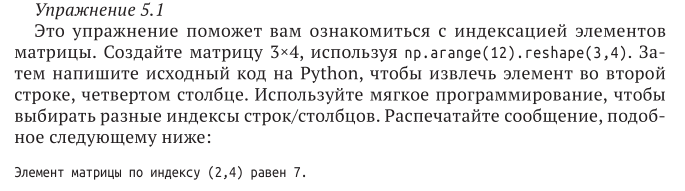

In [21]:
M = np.arange(12).reshape(3,4)

print(M)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [34]:
def return_elem_from_matrix(matrix, row, col):
    # здесь еще можно написать разные проверки. что индекс в диапазоне и т.д.
    # но я не стал этим заниматься, т.к. суть ни в этом
    return print(f'Элемент матрицы по индексу ({row},{col}) равен {matrix[row - 1][col - 1]}')

In [32]:
return_elem_from_matrix(M, 2, 4)

Элемент матрицы по индексу (2,4) равен 7


#### Упражнение 5.2
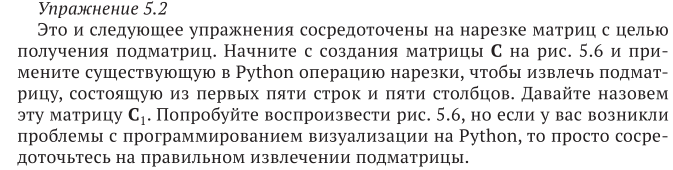

In [56]:
import matplotlib.pyplot as plt

In [38]:
M = np.arange(100).reshape(10, 10)

print(M)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [58]:
C = M[:5,:5]
print(C)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


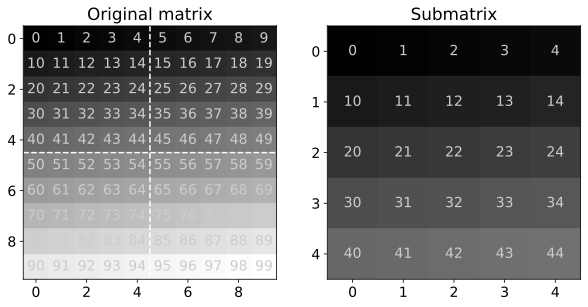

In [61]:
# Код для визуализации

# visualize the matrices as maps
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(M,cmap='gray',origin='upper',vmin=0,vmax=np.max(M))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')
# text labels
for (j,i),num in np.ndenumerate(M):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


axs[1].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(M))
axs[1].set_title('Submatrix')
# text labels
for (j,i),num in np.ndenumerate(C):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')


plt.savefig('Figure_05_06.png',dpi=300)
plt.show()

#### Упражнение 5.3

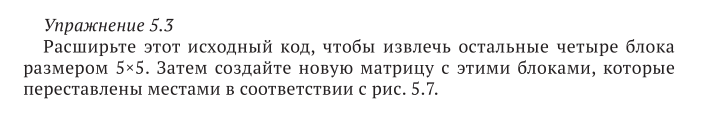

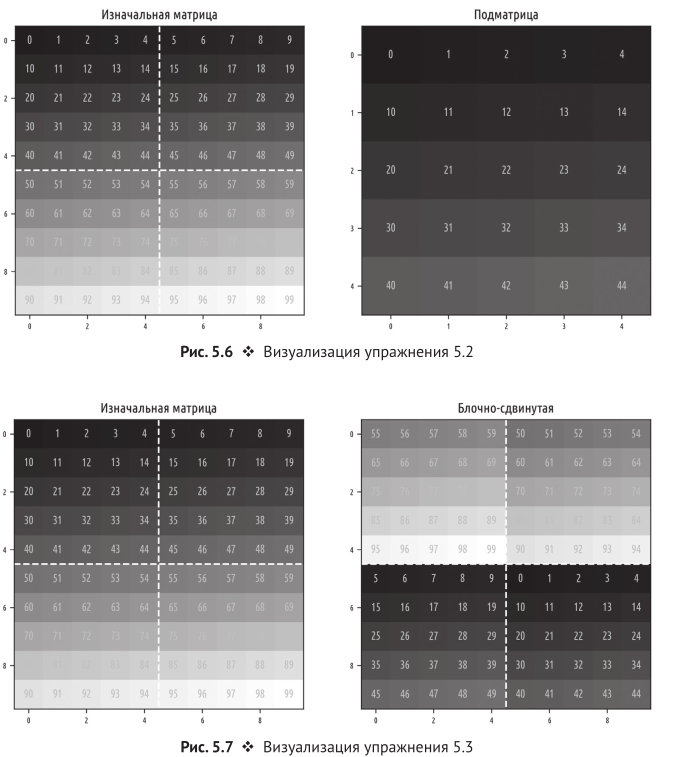

Алгоритм:
- выделяю блоки
- создаю матрицу единиц 10х10
- переприсваиваю заданым диапазонам значения элементов

In [79]:
# левый верхний блок
C1 = M[:5,:5]
# правый верхний блок
C2 = M[:5,5:]
# левый нижний блок
C3 = M[5:,:5]
# правый нижний блок
C4 = M[5:, 5:]

In [80]:
print(C1,C2,C3,C4, sep='\n')

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 5  6  7  8  9]
 [15 16 17 18 19]
 [25 26 27 28 29]
 [35 36 37 38 39]
 [45 46 47 48 49]]
[[50 51 52 53 54]
 [60 61 62 63 64]
 [70 71 72 73 74]
 [80 81 82 83 84]
 [90 91 92 93 94]]
[[55 56 57 58 59]
 [65 66 67 68 69]
 [75 76 77 78 79]
 [85 86 87 88 89]
 [95 96 97 98 99]]


In [86]:
# создаю единичную матрицу

NewM = np.ones(100, int).reshape(10,10)
print(NewM)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [87]:
# переприсваиваю значения
NewM[:5,:5] = C4
NewM[:5,5:] = C3
NewM[5:,:5] = C2
NewM[5:, 5:] = C1

print(NewM)

[[55 56 57 58 59 50 51 52 53 54]
 [65 66 67 68 69 60 61 62 63 64]
 [75 76 77 78 79 70 71 72 73 74]
 [85 86 87 88 89 80 81 82 83 84]
 [95 96 97 98 99 90 91 92 93 94]
 [ 5  6  7  8  9  0  1  2  3  4]
 [15 16 17 18 19 10 11 12 13 14]
 [25 26 27 28 29 20 21 22 23 24]
 [35 36 37 38 39 30 31 32 33 34]
 [45 46 47 48 49 40 41 42 43 44]]


In [88]:
# Ну и разумеется с помощью метода numpy

# rearrange the blocks
newMatrix = np.vstack( (np.hstack((C4,C3)),
                        np.hstack((C2,C1))) )

print(newMatrix)

[[55 56 57 58 59 50 51 52 53 54]
 [65 66 67 68 69 60 61 62 63 64]
 [75 76 77 78 79 70 71 72 73 74]
 [85 86 87 88 89 80 81 82 83 84]
 [95 96 97 98 99 90 91 92 93 94]
 [ 5  6  7  8  9  0  1  2  3  4]
 [15 16 17 18 19 10 11 12 13 14]
 [25 26 27 28 29 20 21 22 23 24]
 [35 36 37 38 39 30 31 32 33 34]
 [45 46 47 48 49 40 41 42 43 44]]


#### Упражнение 5.4

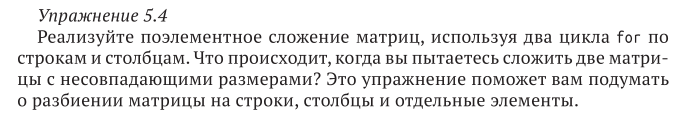

In [89]:
print(C1, C2, sep = '\n')

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[ 5  6  7  8  9]
 [15 16 17 18 19]
 [25 26 27 28 29]
 [35 36 37 38 39]
 [45 46 47 48 49]]


Создаем функцию , которая:
- Принимает 2 матрицы на вход;
- Проверяет равно ли количество столбцов первой матрицы кол-ву строк второй;
- Складывает две матрицы.

In [103]:
M1 = np.arange(12).reshape(3,4)
M2 = np.arange(12,24).reshape(3,4)

print(M1)
print('\n')
print(M2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [125]:
M1.shape

(3, 4)

In [126]:
def sum_matrix(M1, M2):
    """
    Складывает две матрицы.

    Args:
        M1: Первая матрица (NumPy array).
        M2: Вторая матрица (NumPy array).

    Returns:
        Сумма матриц (NumPy array), или None, если матрицы несовместимы по размеру.

    Raises:
        ValueError: Если матрицы имеют несовместимые размерности.
    """
    
    if M1.shape != M2.shape:
        raise ValueError('Некорректные размерности матриц')
    M_result = np.ones(M1.shape, int)
    for row in range(M1.shape[0]):
        for col in range(M1.shape[1]):
            M_result[row][col] = M1[row][col] + M2[row][col]
    return M_result

In [127]:
print(sum_matrix(M1,M2))

[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]


#### Упражнение 5.5

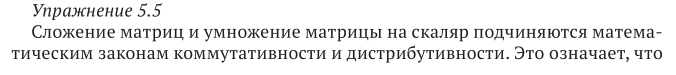


#### Упражнение 5.6

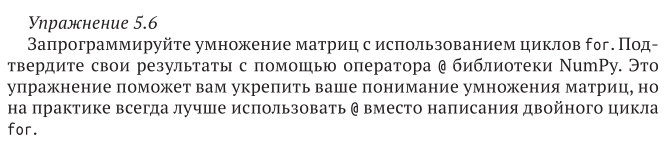

#### Упражнение 5.7

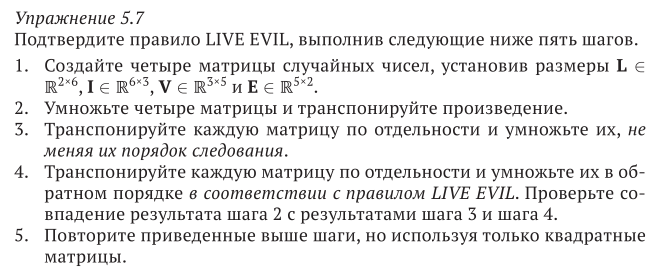

#### Упражнение 5.8

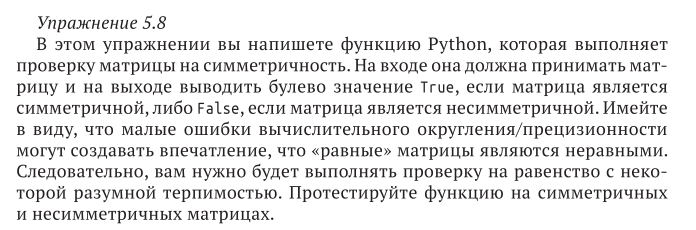

#### Упражнение 5.9

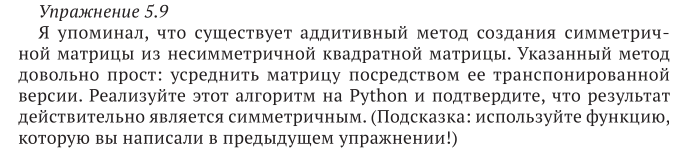

#### Упражнение 5.10

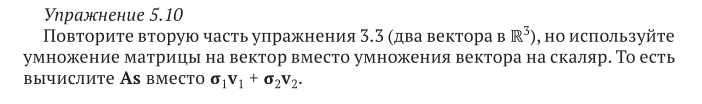

#### Упражнение 5.11

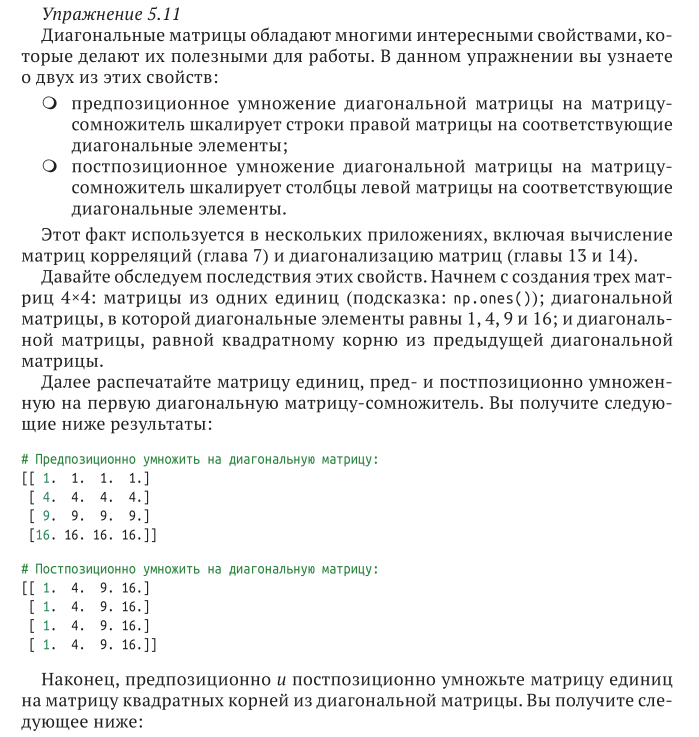
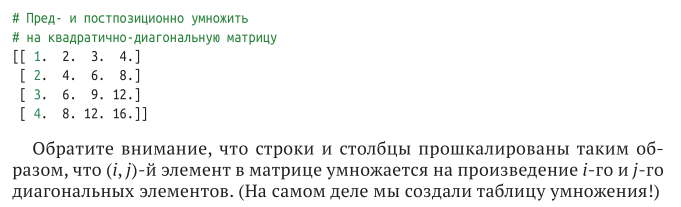

#### Упражнение 5.12

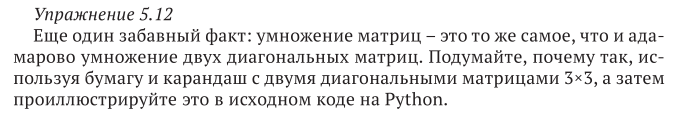